In [1]:
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from sympy.plotting import plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
x,t = symbols('x, t')
ground = exp( -pi*x**2/2 )

def a(f):
    af = 1/sqrt(2*pi)*(x*pi*f + diff(f,x))
    return af

def adagger(f):
    adagf = 1/sqrt(2*pi)*(x*pi*f - diff(f,x))
    return adagf

def nrm(n):
    return 1/sqrt(factorial(n))

def coherent(alpha, m):
    cur=ground
    ch=0
    for i in range(m):
        ch+=cur*exp(-I*pi*(i+1/2)*t)
        ch =simplify(ch)
        cur=1/factorial(i)*alpha*adagger(cur)
    return exp(-alpha**2/2)*ch

In [40]:
alpha=0.5

ch2=coherent(alpha, 5)

In [41]:
ch2.subs({t:0})

0.882496902584595*(0.0208333333333333*pi**2*x**4 + 0.125*sqrt(2)*pi**(3/2)*x**3 + 0.4375*pi*x**2 + 0.3125*sqrt(2)*sqrt(pi)*x + 0.765625)*exp(-pi*x**2/2)

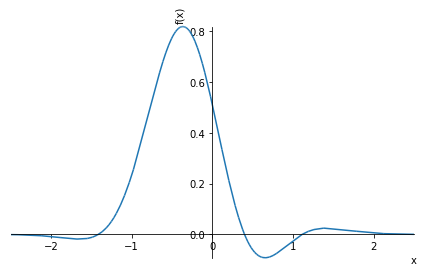

In [42]:
p = plot( re(ch2.subs({t:0.6})), label="coherent", xlim=[-2.5,2.5], show=False )
p.show()

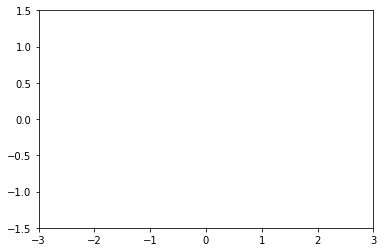

In [43]:
fig, ax = plt.subplots();
ax.set_xlim(( -3, 3))
ax.set_ylim((-1.5, 1.5))
line, = ax.plot([], [])

In [44]:
def init():
    line.set_data([], [])
    return (line,)

In [51]:
def animate(i):
    global x
    chn=lambdify(x, ch2.subs({t:i/50.0}))
    xv = np.linspace(-3, 3, 100)
    yv = np.abs( np.array(list(map(lambda v: chn(v), xv))) )
    line.set_data(xv, yv)
    return (line,)

In [52]:
animate(0)

(<matplotlib.lines.Line2D at 0x7f7d3aadc2e8>,)

In [53]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, 
                               blit=True)

In [54]:
HTML(anim.to_jshtml())